In [25]:
#데이터 출처 https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'

In [7]:
df = pd.read_csv("./data/walmart.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [11]:
#User_ID,Occupation(1~20),Marital_Status(0,1),Product_Category(1~20) 범주형자료
df['User_ID'] = df['User_ID'].astype("object")
df['Occupation'] = df['Occupation'].astype("object")
df['Marital_Status'] = df['Marital_Status'].astype("object")
df['Product_Category'] = df['Product_Category'].astype("object")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [33]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [37]:
df.describe(include="object").T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


# Visualization 시각화

## - 성별에 따른 purchase

In [97]:
df.groupby('Gender').Purchase.count()

Gender
F    135809
M    414259
Name: Purchase, dtype: int64

C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\2106034841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gd_df, x="Gender", y="count_Purchase", palette= {"M":"#0071ce", "F":"#ffc220"})


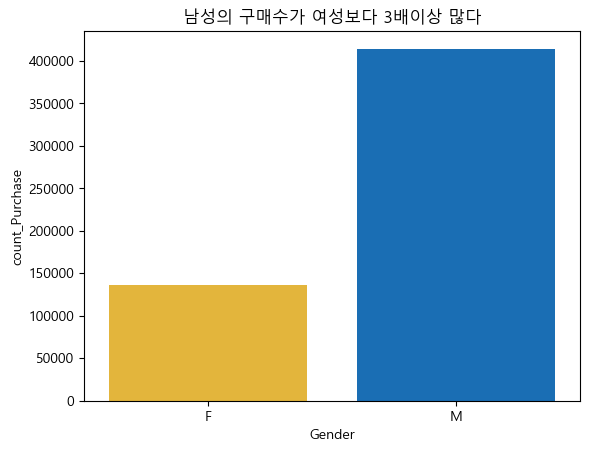

In [27]:
gd_df = df.groupby(['Gender']).size().to_frame("count_Purchase").reset_index()

sns.barplot(data=gd_df, x="Gender", y="count_Purchase", palette= {"M":"#0071ce", "F":"#ffc220"})
plt.title("남성의 구매수가 여성보다 3배이상 많다")
plt.show()

C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\674062943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Gender", y='Purchase', palette = {"M":"#0071ce", "F":"#ffc220"}, )


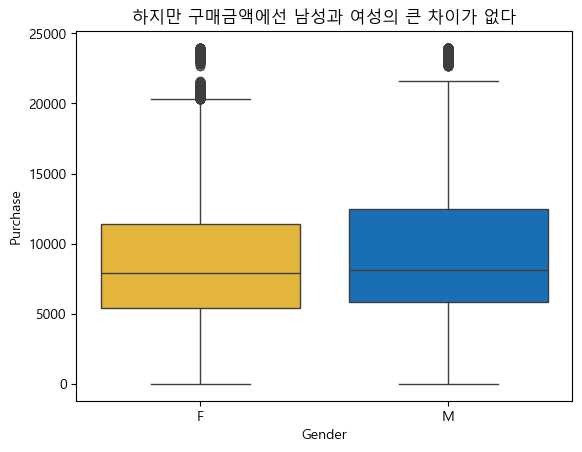

In [29]:
# Gender
sns.boxplot(data = df, x = "Gender", y='Purchase', palette = {"M":"#0071ce", "F":"#ffc220"}, )
plt.title("하지만 구매금액에선 남성과 여성의 큰 차이가 없다")

plt.show()

In [92]:
df.groupby('Gender').Purchase.agg([np.mean, np.std, np.min, np.max])

C:\Users\엄지영\AppData\Local\Temp\ipykernel_17188\3113403492.py:1: FutureWarning: The provided callable <function mean at 0x000001BD70EA71A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Gender').Purchase.agg([np.mean, np.std, np.min, np.max])
C:\Users\엄지영\AppData\Local\Temp\ipykernel_17188\3113403492.py:1: FutureWarning: The provided callable <function std at 0x000001BD70EA72E0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby('Gender').Purchase.agg([np.mean, np.std, np.min, np.max])
C:\Users\엄지영\AppData\Local\Temp\ipykernel_17188\3113403492.py:1: FutureWarning: The provided callable <function min at 0x000001BD70EA68E0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be

,mean,std,min,max
Gender,,,,
F,8734.565765,4767.233289,12,23959
M,9437.526040,5092.186210,12,23961


- 남성과 여성의 구매수만 비교해서 보았을 땐 남성이 여성의 약 3배 이상으로 구매수가 많았다.

하지만 구매 금액을 비교해보니 남성이 여성보다 평균 700보다 높기는 하나 

여성보다 3배 이상 산다는 것을 염두해서 보면 더 저렴한 물건을 많이 산다는 라고 짐작해볼 수 있다.

## - 결혼 여부에 따른 purchase

In [50]:
df.groupby('Marital_Status').Purchase.count()

Marital_Status
0    324731
1    225337
Name: Purchase, dtype: int64

C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\3412661045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mt_df, x="Marital_Status", y="count_Purchase", palette= {"0":"#0071ce", "1":"#ffc220"})


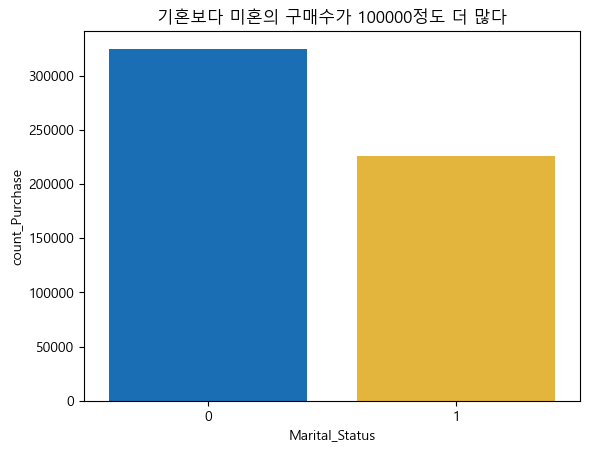

In [58]:
mt_df = df.groupby(['Marital_Status']).size().to_frame("count_Purchase").reset_index()

sns.barplot(data=mt_df, x="Marital_Status", y="count_Purchase", palette= {"0":"#0071ce", "1":"#ffc220"})
plt.title("기혼보다 미혼의 구매수가 100000정도 더 많다")
plt.show()

C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\1717417505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = modify_df, x = "Marital_Status", y='Purchase',palette = {"Not Married":"#0071ce", "Married":"#ffc220"})


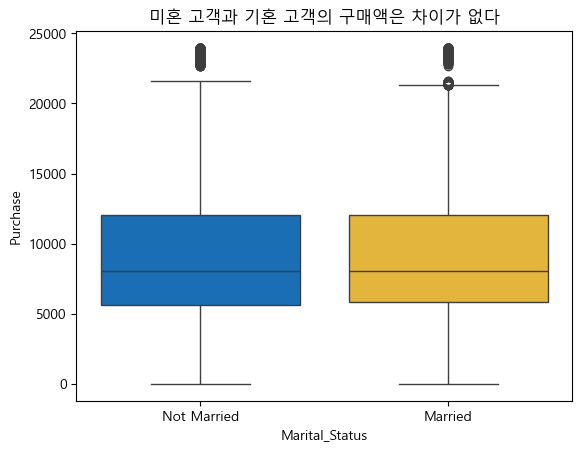

In [42]:
# Married Vs not-Married
modify_df = df.copy()
modify_df.loc[modify_df['Marital_Status'] == 0, 'Marital_Status'] = "Not Married"
modify_df.loc[modify_df['Marital_Status'] == 1, 'Marital_Status'] = "Married"

sns.boxplot(data = modify_df, x = "Marital_Status", y='Purchase',palette = {"Not Married":"#0071ce", "Married":"#ffc220"})
plt.title("미혼 고객과 기혼 고객의 구매액은 차이가 없다")

plt.show()

In [60]:
df.groupby('Marital_Status').Purchase.agg([np.mean, np.std, np.min, np.max])

C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\2514039503.py:1: FutureWarning: The provided callable <function mean at 0x000001CC872A6DE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Marital_Status').Purchase.agg([np.mean, np.std, np.min, np.max])
C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\2514039503.py:1: FutureWarning: The provided callable <function std at 0x000001CC872A6F20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby('Marital_Status').Purchase.agg([np.mean, np.std, np.min, np.max])
C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\2514039503.py:1: FutureWarning: The provided callable <function min at 0x000001CC872A6520> is currently using SeriesGroupBy.min. In a future version of pandas, the provided 

,mean,std,min,max
Marital_Status,,,,
0,9265.907619,5027.347859,12,23961
1,9261.174574,5016.897378,12,23961


- 미혼과 기혼의 구매수는 미혼이 100000정도 더 많다. 하지만 구매금액을 보면 평균 등 거의 차이가 없는 것을 볼 수 있다.

## - Age에 따른 구매  차이

C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\2017579432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a_df, x="Age", y="count_Purchase", palette= 'colorblind')


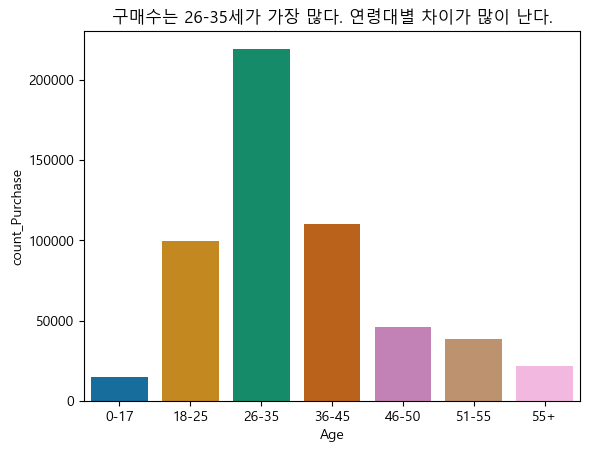

In [73]:
a_df = df.groupby(['Age']).size().to_frame("count_Purchase").reset_index()

sns.barplot(data=a_df, x="Age", y="count_Purchase", palette= 'colorblind')
plt.title("구매수는 26-35세가 가장 많다. 연령대별 차이가 많이 난다.")
plt.show()

C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\230450012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "Age", y='Purchase',estimator=np.mean, ax=ax, palette = "colorblind", order=sorted(modify_df['Age'].unique()))


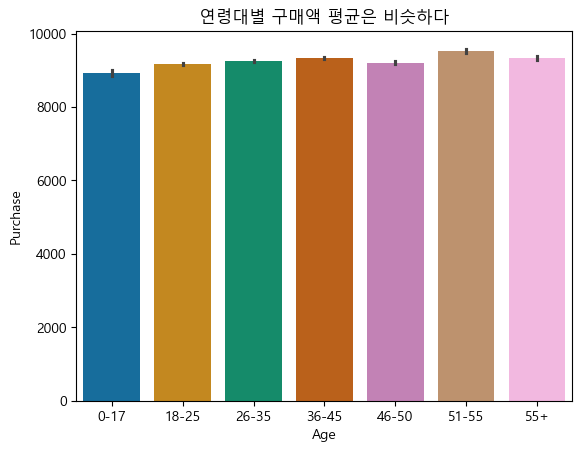

In [67]:
# Age Distribution
bar, ax = plt.subplots()
sns.barplot(data = df, x = "Age", y='Purchase',estimator=np.mean, ax=ax, palette = "colorblind", order=sorted(modify_df['Age'].unique()))
plt.title("연령대별 구매액 평균은 비슷하다")
plt.show()

## - 직업군에  따른 구매 차이

C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\1244856787.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=occ_df, x="Occupation", y="count_Occupation", palette=colors)


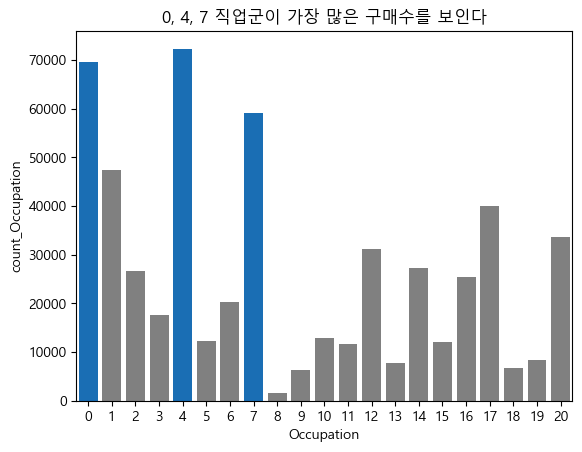

In [87]:
# Occupations in our sales
occ_df = df.groupby(['Occupation']).size().to_frame("count_Occupation").reset_index()

top_n_values = occ_df['count_Occupation'].nlargest(3).values

colors = ["#0071ce" if x in top_n_values else "gray" for x in occ_df['count_Occupation']]

sns.barplot(data=occ_df, x="Occupation", y="count_Occupation", palette=colors)
plt.title("0, 4, 7 직업군이 가장 많은 구매수를 보인다")
plt.show()


C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\1577582644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "Occupation", y='Purchase',estimator=np.mean, ax=ax, palette = "colorblind", order=sorted(modify_df['Occupation'].unique()))


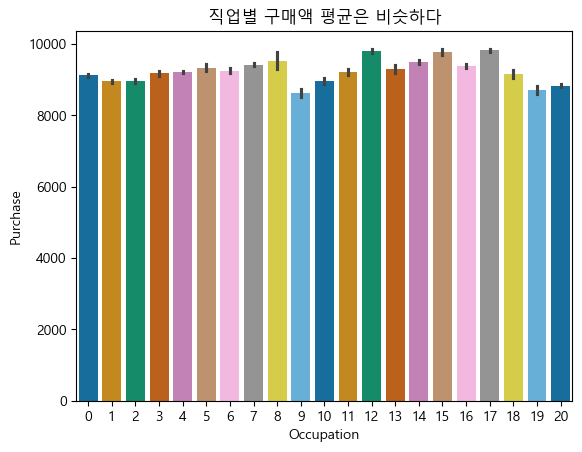

In [92]:
bar, ax = plt.subplots()
sns.barplot(data = df, x = "Occupation", y='Purchase',estimator=np.mean, ax=ax, palette = "colorblind", order=sorted(modify_df['Occupation'].unique()))
plt.title("직업별 구매액 평균은 비슷하다")
plt.show()

C:\Users\엄지영\AppData\Local\Temp\ipykernel_17188\4102711375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "City_Category",  palette = "colorblind", order = sorted(df['City_Category'].unique()))


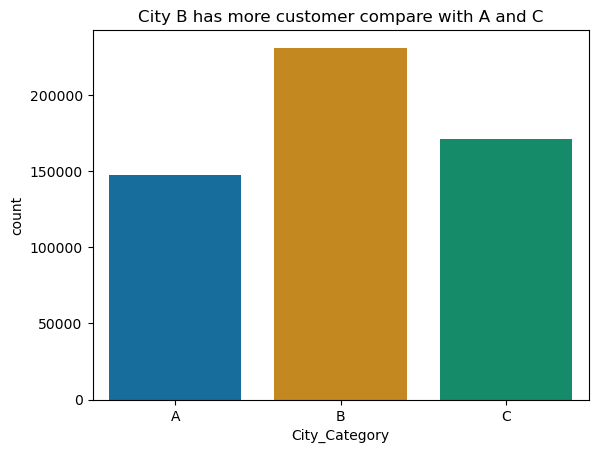

In [54]:
# City Purchase
sns.countplot(data = df, x = "City_Category",  palette = "colorblind", order = sorted(df['City_Category'].unique()))
plt.title("City B has more customer compare with A and C")

plt.show()

C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\3706896498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "City_Category", y='Purchase',estimator=np.mean, ax=ax, palette = "colorblind", order=sorted(modify_df['City_Category'].unique()))


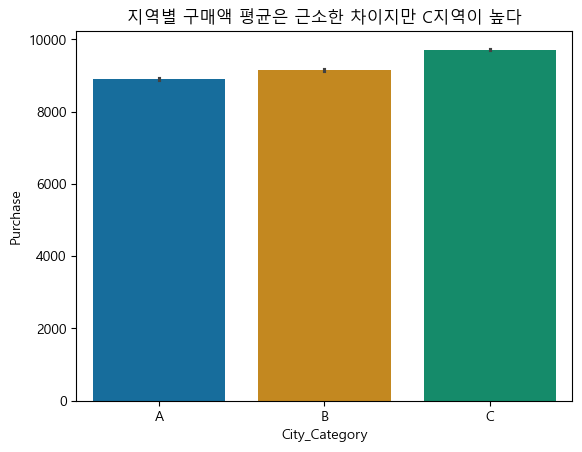

In [96]:
bar, ax = plt.subplots()
sns.barplot(data = df, x = "City_Category", y='Purchase',estimator=np.mean, ax=ax, palette = "colorblind", order=sorted(modify_df['City_Category'].unique()))
plt.title('지역별 구매액 평균은 근소한 차이지만 C지역이 높다')
plt.show()

C:\Users\엄지영\AppData\Local\Temp\ipykernel_17188\3297780175.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "Stay_In_Current_City_Years", palette = "colorblind", order=sorted(modify_df['Stay_In_Current_City_Years'].unique()))


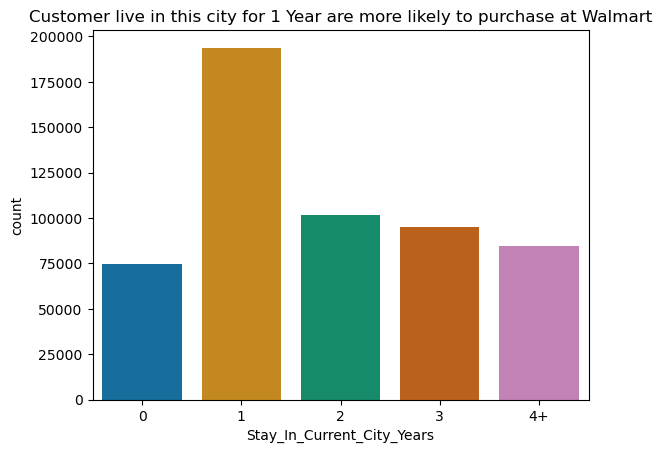

In [56]:
# Stay Time
sns.countplot(data = df, x = "Stay_In_Current_City_Years", palette = "colorblind", order=sorted(modify_df['Stay_In_Current_City_Years'].unique()))
plt.title("Customer live in this city for 1 Year are more likely to purchase at Walmart")
plt.show()

C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\4154192124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "Stay_In_Current_City_Years", y='Purchase',estimator=np.mean, ax=ax, palette = "colorblind", order=sorted(modify_df['Stay_In_Current_City_Years'].unique()))


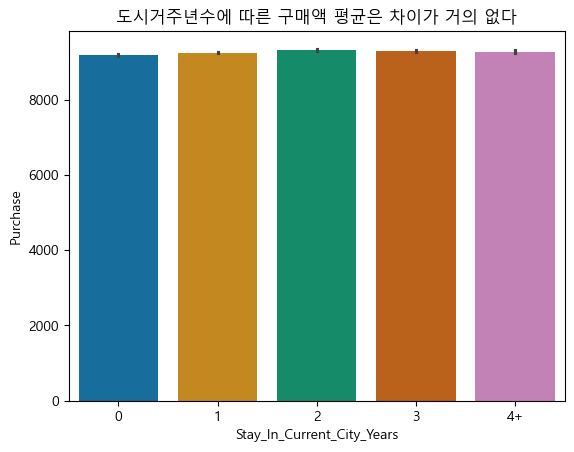

In [102]:
bar, ax = plt.subplots()
sns.barplot(data = df, x = "Stay_In_Current_City_Years", y='Purchase',estimator=np.mean, ax=ax, palette = "colorblind", order=sorted(modify_df['Stay_In_Current_City_Years'].unique()))
plt.title('도시거주년수에 따른 구매액 평균은 차이가 거의 없다')
plt.show()

In [ ]:
occ_df = df.groupby(['Occupation']).size().to_frame("count_occupation").reset_index()

C:\Users\엄지영\AppData\Local\Temp\ipykernel_17188\2650148204.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pc_df, x="Product_Category", y="count_occupation", palette=colors)


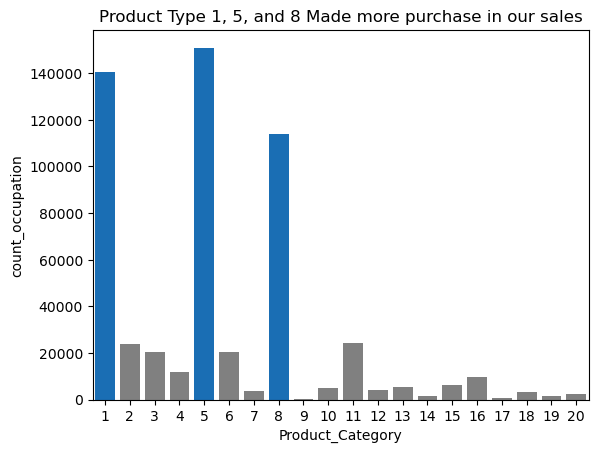

In [58]:
# City Purchase
pc_df = df.groupby(['Product_Category']).size().to_frame("count_occupation").reset_index()

top_n_values = pc_df['count_occupation'].nlargest(3).values

colors = ["#0071ce" if x in top_n_values else "gray" for x in pc_df['count_occupation']]

sns.barplot(data=pc_df, x="Product_Category", y="count_occupation", palette=colors)
plt.title("Product Type 1, 5, and 8 Made more purchase in our sales")
plt.show()

C:\Users\엄지영\AppData\Local\Temp\ipykernel_21884\134188640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "Product_Category", y='Purchase',estimator=np.mean, ax=ax, palette = "colorblind", order=sorted(modify_df['Product_Category'].unique()))


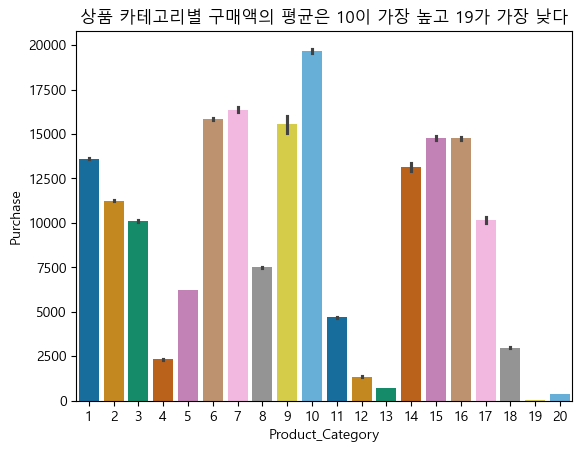

In [108]:
bar, ax = plt.subplots()
sns.barplot(data = df, x = "Product_Category", y='Purchase',estimator=np.mean, ax=ax, palette = "colorblind", order=sorted(modify_df['Product_Category'].unique()))

plt.title('상품 카테고리별 구매액의 평균은 10이 가장 높고 19가 가장 낮다')
plt.show()

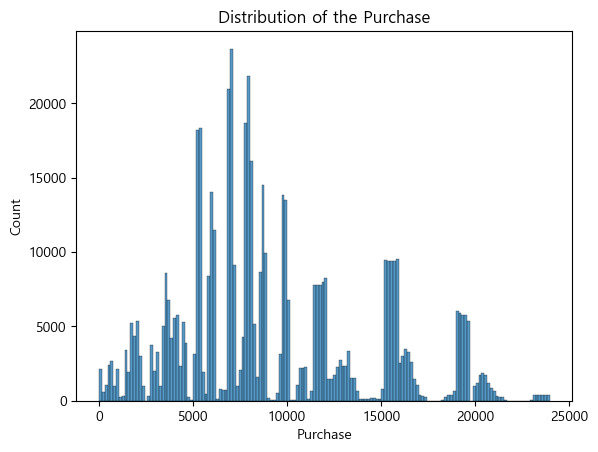

In [77]:
# Purchase Distribution
sns.histplot(data = df, x = "Purchase")
plt.title("Distribution of the Purchase")
plt.show()

성별과 연령대, 직업군과 도시별, 결혼여부별, 거주기간별로 구매량을 확인하고 선호하는 품목 카테고리를 파악하여 어떤 그룹이 어떠한 제품군을 선호하며 가장 소비량이 많은지 확인한다. 이를 통해 적은 비중의 고객 유형에 대해서는 신규 고객 유치를 위한 방향성에 대한 힌트를 얻고 기존의 고객중 가장 많은 매출이 발생했던 고객의 특징 역시 파악하고 강화하여 구매액수를 늘리기 위한 방법을 고안한다.


구매수의 경우, 

*성별-남성*

*결혼여부-미혼*

*연령대-26-35세*

*직업군-0,4,7*

*지역-B도시*

*도시거주년수-1년*

*상품카테고리-1,5,8 상품*

을 구매할수록 구매수가 높았다.

하지만 구매액의 경우,

성별,결혼여부,연령대,직업군,지역,도시거주년수에 따라 변수별로 유의미한 차이가 보이지 않았지만

상품 카테고리의 경우 10,7,6의 평균 구매액이 높았다. 구매수와 비례하여 보이지 않기 때문에 10,7,6이 금액대가 큰 상품일 것으로 추측된다.

In [127]:
#지역별 상품 카테고리 선호
cc_dc=df.groupby(['City_Category', 'Product_Category']).agg({'Purchase': 'count'}).reset_index()
cc_dc

,City_Category,Product_Category,Purchase
0,A,1,35081
1,A,2,6141
2,A,3,4943
3,A,4,3050
4,A,5,42211
5,A,6,5507
6,A,7,1226
7,A,8,32179
8,A,9,110
9,A,10,1333
